In [22]:
# import stuff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

import scipy
from scipy import signal
import h5py, time
from iminuit import Minuit, describe
from pprint import pprint # we use this to pretty print some stuff later
import glob
import pandas as pd
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import *
from AnaUtil import *
from bisect import bisect_left
from tqdm import tqdm
import datetime as dt
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [23]:
Year = "2020"
Month = "01"
Day = "21"
BeadNumber =1
folder_basic = r"/data/new_trap/"+ Year + Month + Day + "/Bead"+str(BeadNumber)
folder = folder_basic + "/Shaking/Height_Determination/"

In [24]:
def height_response(foldername, str_axis, drive_freq,measurement,norm=True):   
    bdfs = load_dir(foldername, file_prefix = 'Oscillating%d_' %measurement, max_file=500)
    resp = [np.std(bb.response_at_freq2(str_axis, drive_freq=drive_freq)) for bb in bdfs]
    height = [10*np.mean(bdfs[i].cant_pos[2]) for i in range(len(bdfs))]
    
    if(norm==True):
        norm = resp[0]
        resp = resp/norm    
    return resp,height

In [48]:
files = load_dir(folder,file_prefix="Oscillating14_")

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
21  files in folder
21  files loaded


No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
21  files in folder
21  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


No height data
No height data
No height data
No height data
No height data
21  files in folder
21  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
19  files in folder
19  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
19  files in folder
19  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No h

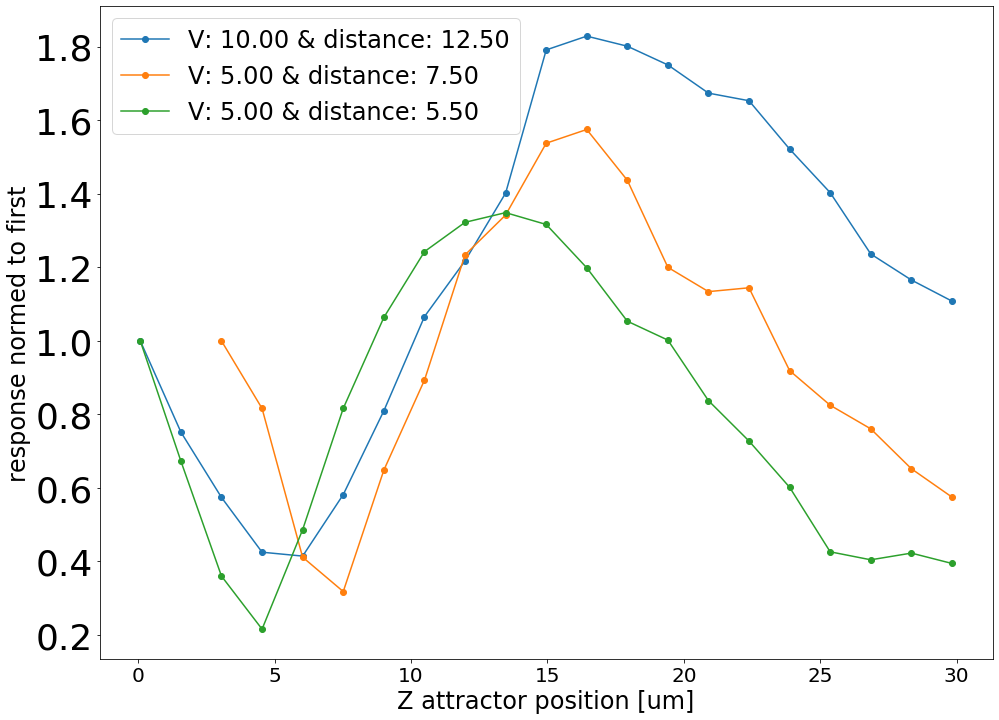

In [37]:
voltage = [10,5,5,5]
distance = [12.5,7.5,5.5]
meas = [12,13,14]


for element in range(3):
    plt.plot(height_response(folder,"z",151,meas[element])[1],height_response(folder,"z",151,meas[element])[0],linestyle="-",marker="o", label="V: %2.2f & distance: %2.2f" %(voltage[element],distance[element]))
plt.ylabel("response normed to first")
plt.xlabel("Z attractor position [um]")
plt.legend()    
plt.savefig("height_normalized_20200129.png", dpi=300, bbox_inches="tight")
plt.show()

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
21  files in folder
21  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
21  files in folder
21  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
21  files in folder
21  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
21  files in folder
21  files loaded


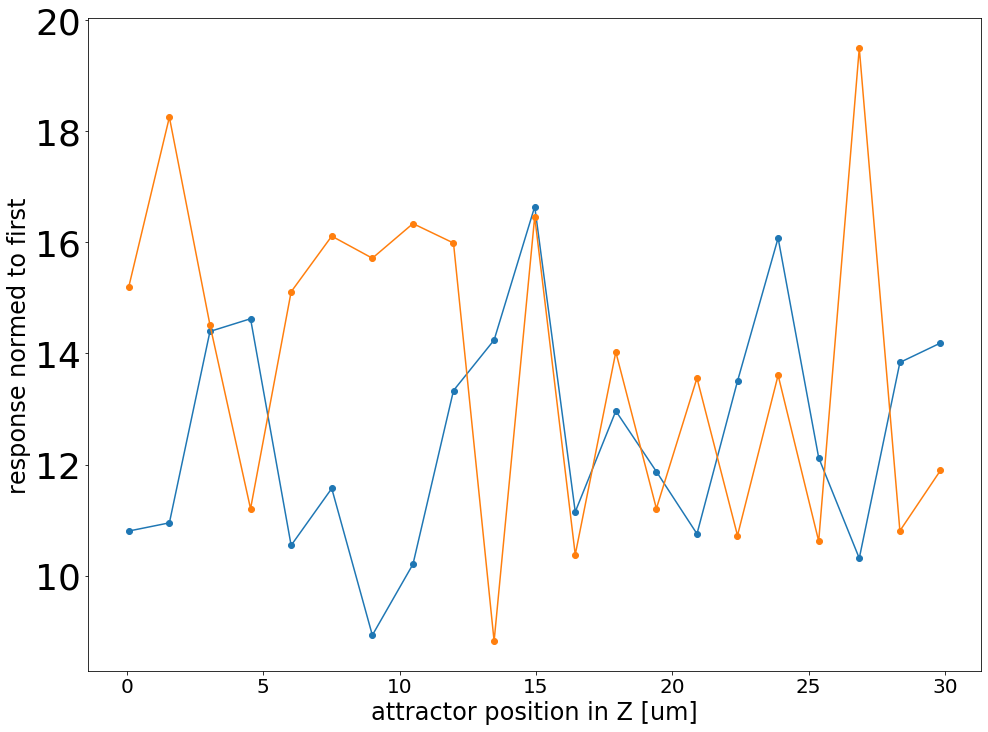

In [57]:
meas = 9
meas2 = 10
plt.plot(height_response(folder,"z",151,meas)[1],height_response(folder,"z",151,meas,norm=False)[0],linestyle="-",marker="o", label="V: %2.2f & distance: %2.2f" %(voltage[element],distance[element]))
plt.plot(height_response(folder,"z",151,meas2)[1],height_response(folder,"z",151,meas2,norm=False)[0],linestyle="-",marker="o", label="V: %2.2f & distance: %2.2f" %(voltage[element],distance[element]))

plt.ylabel("response normed to first")
plt.xlabel("attractor position in Z [um]")
#plt.savefig("height_normalized_20200129.png", dpi=300, bbox_inches="tight")

plt.show()

In [27]:
bdfs1 = load_dir(folder, file_prefix = 'Oscillating10_', max_file=500)
bdfs2 = load_dir(folder, file_prefix = 'Oscillating11_', max_file=500)


No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
21  files in folder
21  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
21  files in folder
21  files loaded


In [60]:
for i in np.arange(4,5,1):
    plt.plot(bdfs1[i].z)
    plt.plot(bdfs2[i].z)
    plt.xlabel("time [s/10]")
    plt.ylabel("z signal [a.u.]")
    #plt.savefig("zresp_innout_20200129.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.plot(bdfs1[i].x2)
    plt.plot(bdfs2[i].x2)
    plt.xlabel("time/5000 [s]")
    plt.ylabel("x signal [a.u.]")
    plt.savefig("xresp_innout_20200129.png", dpi=300, bbox_inches="tight")

    plt.show()


AttributeError: 'BeadDataFile' object has no attribute 'z'

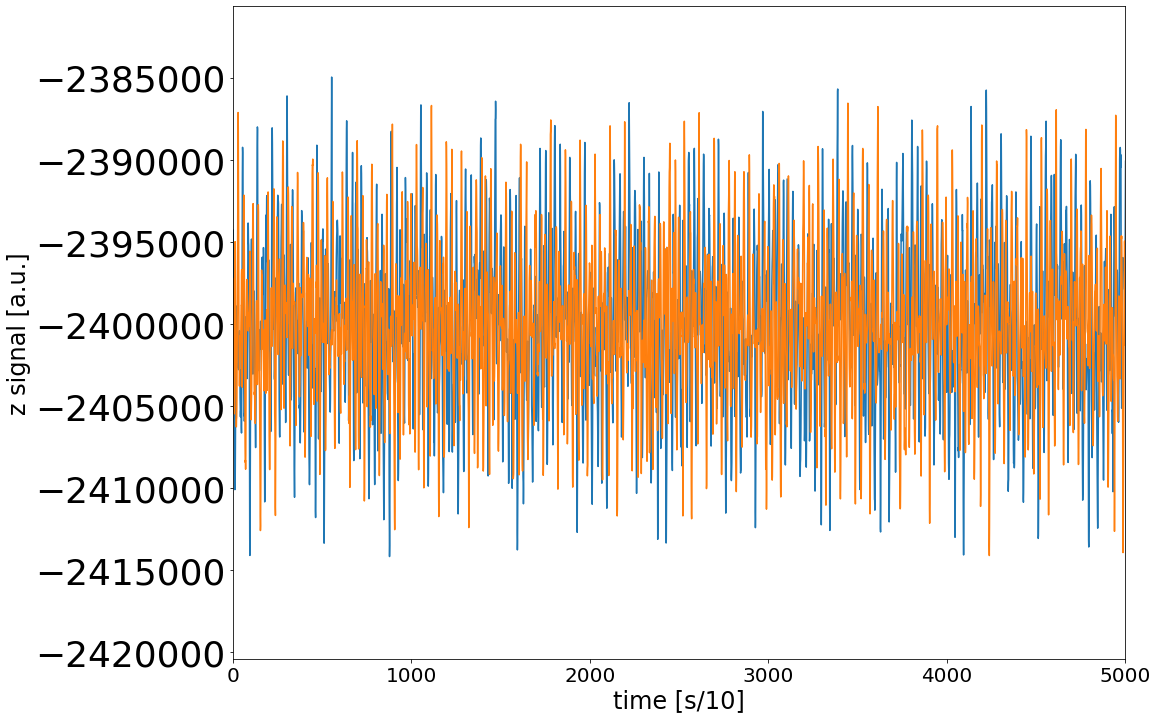

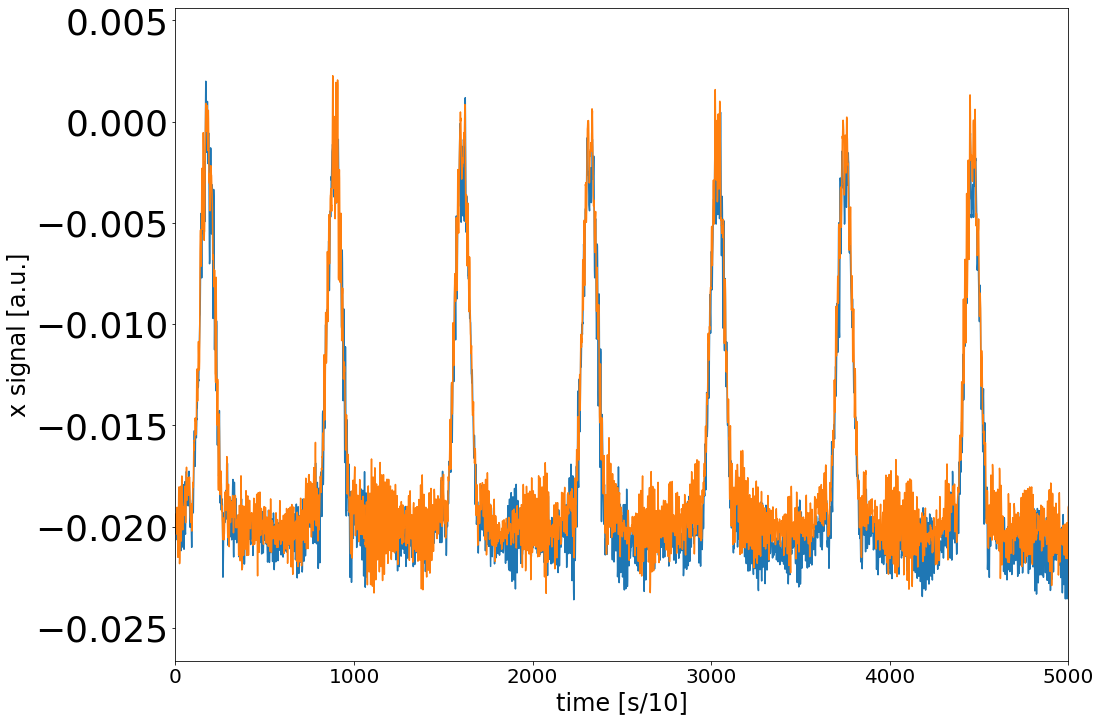

In [44]:
for i in np.arange(4,5,1):
    plt.plot(bdfs1[i].z2)
    plt.plot(bdfs2[i].z2)
    plt.xlim(0,5000)
    plt.xlabel("time [s/10]")
    plt.ylabel("z signal [a.u.]")
    plt.show()
    plt.plot(bdfs1[i].x2)
    plt.plot(bdfs2[i].x2)
    plt.xlim(0,5000)
    plt.xlabel("time [s/10]")
    plt.ylabel("x signal [a.u.]")
    plt.savefig("xresp_zoom_innout_20200129.png", dpi=300, bbox_inches="tight")

    

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
21  files in folder
21  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


No height data
No height data
No height data
No height data
21  files in folder
21  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
19  files in folder
19  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
19  files in folder
19  files loaded
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No h

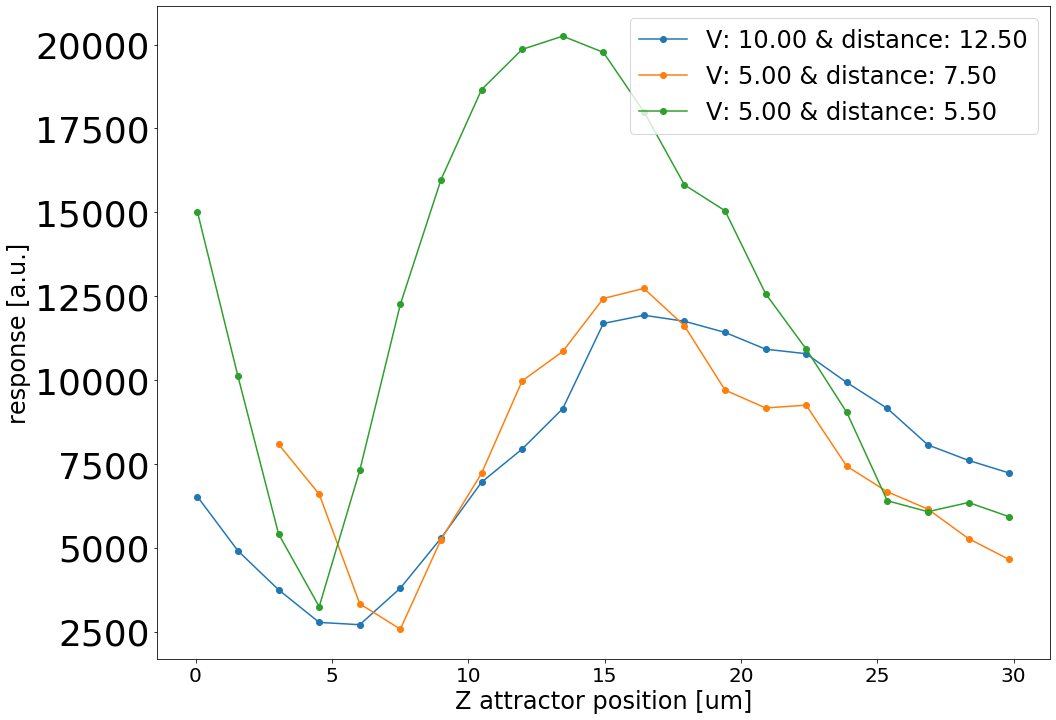

In [39]:
voltage = [10,5,5,5]
distance = [12.5,7.5,5.5]
meas = [12,13,14]


for element in range(3):
    plt.plot(height_response(folder,"z",151,meas[element])[1],height_response(folder,"z",151,meas[element],norm=False)[0],linestyle="-",marker="o", label="V: %2.2f & distance: %2.2f" %(voltage[element],distance[element]))
plt.ylabel("response [a.u.]")
plt.xlabel("Z attractor position [um]")
plt.legend()    
plt.savefig("height_20200129.png", dpi=300, bbox_inches="tight")

plt.show()